In [1]:
# import package dan modul yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('whitegrid')

In [3]:
# membaca review.csv
df = pd.read_csv('review.csv')

In [4]:
df.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [5]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,616719923X,"[0, 0]",4.0,Just another flavor of Kit Kat but the taste i...,"06 1, 2013",A1VEELTKS8NLZB,Amazon Customer,Good Taste,1370044800
1,616719923X,"[0, 1]",3.0,I bought this on impulse and it comes from Jap...,"05 19, 2014",A14R9XMZVJ6INB,amf0001,"3.5 stars, sadly not as wonderful as I had hoped",1400457600
2,616719923X,"[3, 4]",4.0,Really good. Great gift for any fan of green t...,"10 8, 2013",A27IQHDZFQFNGG,Caitlin,Yum!,1381190400
3,616719923X,"[0, 0]",5.0,"I had never had it before, was curious to see ...","05 20, 2013",A31QY5TASILE89,DebraDownSth,Unexpected flavor meld,1369008000
4,616719923X,"[1, 2]",4.0,I've been looking forward to trying these afte...,"05 26, 2013",A2LWK003FFMCI5,Diana X.,"Not a very strong tea flavor, but still yummy ...",1369526400


In [6]:
# Membuat dataframe yang berisikan informasi umum tentang feature yang terdapat di dalam review dataset
data = []
for element in df.columns:
    temp = []
    temp.append(element)
    temp.append(str(df[element].dtype))
    temp.append(df[element].isnull().sum())
    temp.append(round(df[element].isnull().sum() / len(df) * 100, 2))
    temp.append(df[element].nunique())
    temp.append(list(df[element].value_counts().index[:2]))
    data.append(temp)
feature_info = pd.DataFrame(data, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])
feature_info

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,asin,object,0,0.00,8713,"[B000FEH8ME, B002IEVJRY]"
1,helpful,object,0,0.00,1106,"[[0, 0], [1, 1]]"
2,overall,float64,0,0.00,5,"[5.0, 4.0]"
3,reviewText,object,22,0.01,151198,"[very good, Yummy!]"
4,reviewTime,object,0,0.00,3003,"[04 5, 2013, 03 28, 2013]"
5,reviewerID,object,0,0.00,14681,"[A3OXHLG6DIBRW8, AY12DBB0U420B]"
6,reviewerName,object,1493,0.99,13979,"[Amazon Customer, C. Hill ""CFH""]"
7,summary,object,0,0.00,118901,"[Delicious, Delicious!]"
8,unixReviewTime,int64,0,0.00,3003,"[1365120000, 1364428800]"


In [114]:
df['reviewerName'].value_counts()

Amazon Customer                                     1252
C. Hill "CFH"                                        203
Gary Peterson                                        180
NYFB                                                 177
Margaret Picky                                       156
Nerd Alert                                           148
Kindle Customer                                      146
L. Mountford                                         145
csm                                                  140
Comdet                                               140
Shannon Lastowski "Queen of Caffeine"                132
J. Arena                                             126
Mir                                                  123
Lisa Kearns "Lisa Kearns"                            121
Lynrie "Oh HELL no"                                  118
J. Johnson                                           111
grumpyrainbow                                        111
Enchanted  In  Dixie "Enchanted

In [7]:
df.shape

(151254, 9)

Data review memiliki 151254 baris. Artinya, terdapat 151254 review dalam data tersebut. Sementara itu, terdapat 9 kolom yang di mana penjelasan dari kolom tersebut adalah sebagai berikut:

**reviewerID** - ID dari reviewer, misalkan: A2SUAM1J3GNN3B<br>
**asin** - ID dari produk yang di review, misalkan: 0000013714<br>
**reviewerName** - nama dari reviewer<br>
**helpful** - presentase rating membantu atau tidak misalkan 2/3<br>
**reviewText** - text dari review<br>
**overall** - rating yang diberikan oleh user terhadap produk<br>
**summary** - ringkasan dari review<br>
**unixReviewTime** - (unix time)<br>
**reviewTime** - waktu review (raw)<br>

In [8]:
# melakukan copy df sebelum dilakukan perubahan lebih lanjut
df_original = df.copy()

## Feature Exploration

### 1. asin

Kolom ini merupakan kolom yang berisi kode produk. Kode yang sama menunjukkan produk yang sama.

In [9]:
df['asin'].describe()

count         151254
unique          8713
top       B000FEH8ME
freq             742
Name: asin, dtype: object

Terdapat sebanyak 8713 produk dalam kategori grocery dan gourmet yang diulas dalam dataset ini. Produk yang paling banyak direview memiliki kode unik B000FEH8ME yaitu 742 review.

In [10]:
print(df[df['asin'] == 'B000FEH8ME']['reviewText'].iloc[0])

Most gluten-free products taste like cardboard, so when I came upon this sampler, I was happily surprised.  Measurably better tasting than sports' bars and gluten-free breakfast bars, this organic snack recharges your energy and rejuvenates your spirits.  Now don't expect a health product of this caliber to be inexpensive.  I'm happy that PURE is very competitively priced at less than two dollars per bar.Surprisingly, I liked the "Cherry Cashew" flavor over "Wild Blueberry," but the variety can keep you more than satisfied.Nutrition *****, high in omega-3 and fiber, gluten-free, and organic.Price  ***, You get what you pay for.Taste  ****, So fresh, so good.Value  ****, Seldom do you get everything together in one bar.


Dari review di atas kita dapat menduga bahwa item yang paling banyak direview adalah healthy snack bar.

In [11]:
df['asin'].value_counts().head()

B000FEH8ME    742
B002IEVJRY    741
B00934WBRO    476
B006MONQMC    468
B003GTR8IO    445
Name: asin, dtype: int64

In [12]:
for id_product in df['asin'].value_counts().head().index:
    print(df[df['asin'] == id_product]['reviewText'].iloc[0])
    print('\n')

Most gluten-free products taste like cardboard, so when I came upon this sampler, I was happily surprised.  Measurably better tasting than sports' bars and gluten-free breakfast bars, this organic snack recharges your energy and rejuvenates your spirits.  Now don't expect a health product of this caliber to be inexpensive.  I'm happy that PURE is very competitively priced at less than two dollars per bar.Surprisingly, I liked the "Cherry Cashew" flavor over "Wild Blueberry," but the variety can keep you more than satisfied.Nutrition *****, high in omega-3 and fiber, gluten-free, and organic.Price  ***, You get what you pay for.Taste  ****, So fresh, so good.Value  ****, Seldom do you get everything together in one bar.


If your a fan of illy coffee and you like the convenience of a 'to go' can, then listen up. This Can's for you. Compact, travel friendlly and comes in a recyclable container. What more can anyone ask for? Not a fan of coffee that doesn't have at least a lil sugar, I wa

Hasil diatas menginformasikan bahwa 5 item dengan review paling banyak adalah:
1. Healthy Snack Bar
2. Kopi
3. Snack
4. Minuman
5. Kopi

Untuk mempermudah kita mengetahui, produk apa dari id produk yang ada, kita akan menggabungkan data review dengan data meta produk

In [13]:
meta = pd.read_csv('meta.csv')

In [14]:
col = list(df_original.columns)
col.append('title')

df = df.merge(meta, on=['asin'])[col]

df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title
0,616719923X,"[0, 0]",4.0,Just another flavor of Kit Kat but the taste i...,"06 1, 2013",A1VEELTKS8NLZB,Amazon Customer,Good Taste,1370044800,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...
1,616719923X,"[0, 1]",3.0,I bought this on impulse and it comes from Jap...,"05 19, 2014",A14R9XMZVJ6INB,amf0001,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...
2,616719923X,"[3, 4]",4.0,Really good. Great gift for any fan of green t...,"10 8, 2013",A27IQHDZFQFNGG,Caitlin,Yum!,1381190400,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...
3,616719923X,"[0, 0]",5.0,"I had never had it before, was curious to see ...","05 20, 2013",A31QY5TASILE89,DebraDownSth,Unexpected flavor meld,1369008000,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...
4,616719923X,"[1, 2]",4.0,I've been looking forward to trying these afte...,"05 26, 2013",A2LWK003FFMCI5,Diana X.,"Not a very strong tea flavor, but still yummy ...",1369526400,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...


Dengan melakukan merge antara data review dan metadata, kita dapat melihat title dari barang yang di review. Hal ini tentu saja akan lebih memudahkan kita untuk melakukan analisis lebih lanjut, karena apabila barang hanya dalam kode produk kita tidak dapat mengetahui dengan pasti barang apa yang kita sedang analisis.

In [15]:
for id_product in df['asin'].value_counts().head().index:
    print(df[df['asin'] == id_product]['title'].iloc[0])
    print('\n')

Pure Bar Organic Chocolate Brownie, Gluten Free, Raw, Vegan,  1.7-Ounce Bars (Pack of 12)


illy issimo Coffee Drink, Cappuccino, 8.45-Ounce Cans (Pack of 12)


Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram


Vitamin Squeeze Energy Drink, Fruit Punch, 12-Ounce (Pack of 4)


Starbucks Natural Fusions Ground Coffee, Vanilla Flavored, 11-Ounce Packages (Pack of 2)




Prediksi kita berdasarkan review text dengan title dari produk ternyata tidak terlalu berbeda jauh. Barang yang paling banyak di review adalah healthy snack bar, capuccino, organic apple clusters snack, vitamin energy drink, dan starbuck ground coffee. 

In [16]:
df['asin'].value_counts().tail()

B0026JLHOQ    5
B005LINPQC    5
B00BQWQFB4    5
B000RHUVSM    5
B002XPPAGO    5
Name: asin, dtype: int64

Setiap produk setidaknya memiliki 5 review. Sehingga dalam data ini, tidak ada produk yang tidak di review sama sekali.

**Eksplorasi kolom asin dan overall rating**

> Menampilkan produk dengan rata-rata rating 5 (rating sempurna)

In [17]:
(df.groupby('asin').mean()['overall'] == 5).sum()

747

Terdapat 747 produk yang memiliki rata-rata overall 5.

In [18]:
mean_overall_5 = list((df.groupby('asin').mean()['overall'] == 5).sort_values(ascending=False).head(747).index)

In [19]:
def product_overall_5(df):
    if df['asin'] in mean_overall_5:
        return True
    else:
        return False

In [20]:
i = 0
index_overall_5 = []
for element in df.apply(product_overall_5, axis=1):
    if element == True:
        index_overall_5.append(i)
    i+= 1

In [21]:
df_mean_overall_5 = pd.DataFrame(list(set(df.loc[index_overall_5]['title'])))

In [22]:
df_mean_overall_5.head(20)

,0
0,NaN
1,"No Salt Salt Substitute, 11-Ounce Can"
2,"Frontier Sage Leaf Rubbed, 16 Ounce Bag"
3,"V8 V-Fusion Peach Mango 100% Juice, 46-Ounce B..."
4,Sweetleaf Flavored Sweetener- Vanilla Creme 2 ...
5,"Taylors of Harrogate, Yorkshire Tea, 40-Count ..."
6,One 16 Ounce Bag Frontier Curry Powder Certifi...
7,"Bob's Red Mill Bread Mix Rye, 17-Ounce (Pack o..."
8,"La Florentine Torrone, Lemon, Orange, Vanilla,..."
9,Simply Organic Cinnamon Ground Certified Organ...


> Menampilkan produk dengan rata-rata rating 1 (rating buruk)

In [23]:
(df.groupby('asin').mean()['overall'] == 1).sum()

1

Hanya terdapat 1 produk saja yang rata-rata ratingnya adalah 1

In [24]:
mean_overall_1 = (df.groupby('asin').mean()['overall'] == 1).sort_values(ascending=False).head(1).index

In [25]:
df[df['asin'] == list(mean_overall_1)[0]]['title'].iloc[0]

'Kopi Luwak 100% Pure Wild &amp; Organic Medium Roast Robusta Whole Civet Coffee Beans - (4 ounces/113 grams) - Roasted in the USA Imported From the Philippines'

In [26]:
df[df['asin'] == list(mean_overall_1)[0]]['reviewText']

100370    Can the human race stoop any lower? Sometimes ...
100371    ...oh wait....it is s***! Poor animals are kep...
100372    who in their right mind would pay ten bucks pe...
100373    I was shocked to hear about the cruelty and de...
100374    now who in their right mind , that knows that ...
Name: reviewText, dtype: object

Produk dengan rating rata-rata yang paling buruk ternyata adalah produk kopi luwak yang diimpor dari negara Filipina. Kebanyakan orang yang review tidak suka terhadap produk ini karena mereka menganggap bahwa produksi kopi luwak menyakiti hewan dan diproduksi dengan kejam.

## 2. helpful

Kolom ini menginformasikan presentase dari jumlah orang yang menyatakan bahwa review tersebut berguna. Nilai dari kolom ini secara default berbentuk seperti list dengan dua nilai, nilai pertama adalah jumlah orang yang menilai bahwa review ini berguna sedangkan nilai kedua adalah jumlah semua orang yang memberikan vote terhadap review ini.

Sebelum melakukan analisis lebih lanjut dengan kolom ini, kita akan membuat kolom baru yaitu count_helpfull dan all_count dimana count_helpfull adalah angka pertama dari kolom helpful sedangkan all_count adalah angka kedua dari kolom helpful.

In [27]:
# membuat fungsi untuk memisahkan kedua nilai dari kolom helpful
def helpful_count(ser):
    return int(ser.replace('[', '').replace(']', '').split(', ')[0])

def all_helpful_count(ser):
    return int(ser.replace('[', '').replace(']', '').split(', ')[1])  

In [28]:
df['count_helpful'] = df['helpful'].apply(helpful_count)

df['all_count'] = df['helpful'].apply(all_helpful_count)

In [29]:
df['percentage_helpful'] = round((df['count_helpful'] / df['all_count']) * 100, 2)

Kolom percentage_helpful juga ditambahkan yang merupakan presentase antara count_helpful terhadap all_count. Semakin besar nilai dari kolom ini, menunjukan bahwa review teresbut semakin bermanfaat. Kita tidak membutuhkan lagi kolom helpful sehingga kita dapat drop kolom ini.

In [30]:
df.drop('helpful', axis=1, inplace=True)

In [31]:
df.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title,count_helpful,all_count,percentage_helpful
0,616719923X,4.0,Just another flavor of Kit Kat but the taste i...,"06 1, 2013",A1VEELTKS8NLZB,Amazon Customer,Good Taste,1370044800,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,0,0,NaN
1,616719923X,3.0,I bought this on impulse and it comes from Jap...,"05 19, 2014",A14R9XMZVJ6INB,amf0001,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,0,1,0.0
2,616719923X,4.0,Really good. Great gift for any fan of green t...,"10 8, 2013",A27IQHDZFQFNGG,Caitlin,Yum!,1381190400,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,3,4,75.0
3,616719923X,5.0,"I had never had it before, was curious to see ...","05 20, 2013",A31QY5TASILE89,DebraDownSth,Unexpected flavor meld,1369008000,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,0,0,NaN
4,616719923X,4.0,I've been looking forward to trying these afte...,"05 26, 2013",A2LWK003FFMCI5,Diana X.,"Not a very strong tea flavor, but still yummy ...",1369526400,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,1,2,50.0


In [32]:
df['percentage_helpful'].isnull().sum()

86403

Kolom percentage_helpful yang bernilai null (NaN) menandakan bahwa tidak ada orang yang melakukan vote terhadap review tersebut. Artinya, kolom dari all_count pada data tersebut memiliki niai kosong. Terdapat 86403 data yang tidak memiliki vote review.

**Visualisasi kolom helpful**

In [33]:
# Membuat series dengan 6 percentage_helpful terbanyak
ser_percentage_helpful = df['percentage_helpful'].value_counts().head(6)

In [34]:
# Menambahkan data yang percentage_helpful == NaN dan memberinya index 'No Vote'
ser_percentage_helpful['No Vote'] = df['percentage_helpful'].isnull().sum()
ser_percentage_helpful = ser_percentage_helpful.sort_values(ascending=False)

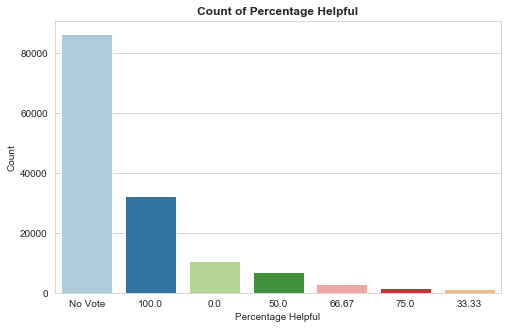

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x=ser_percentage_helpful.index, y=ser_percentage_helpful.values, palette='Paired')
plt.xlabel('Percentage Helpful')
plt.ylabel('Count')
plt.title('Count of Percentage Helpful', weight='bold')
plt.show()

Data paling banyak dari kolom percentage_helpful adalah No Vote [0, 0], kemudian 100% dan 0%. 100% artinya adalah seluruh orang yang melakukan vote terhadap review tersebut menilai bahwa review tersebut membantu. Sementara itu, 0% berarti dari seluruh orang yang melakukan vote tidak ada yang berpikir bahwa review tersebut membantu.

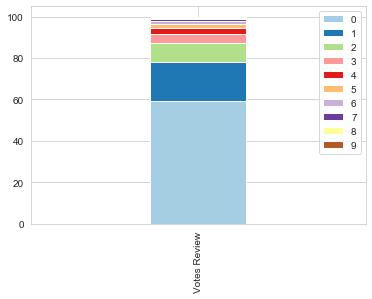

In [36]:
# pd.DataFrame(ser_percentage_helpful/sum(ser_percentage_helpful)*100).transpose().plot.bar(
#     stacked=True, cmap='Paired', width=0.2)
# plt.show()

ser_all_count = df['all_count'].value_counts().head(10)

percentage_all_count = ser_all_count / sum(ser_all_count) * 100

df_percentage_all_count = pd.DataFrame(percentage_all_count).rename({'all_count':'Votes Review'}, axis=1).transpose()

df_percentage_all_count.plot.bar(stacked=True, cmap='Paired', width=0.2)
plt.show()

Banyak review yang tidak memiliki vote helpful. 90% data bahkan tidak memiliki vote lebih dari 5.

In [37]:
df[df['count_helpful'] == df['count_helpful'].max()]

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title,count_helpful,all_count,percentage_helpful
499,B00012182G,5.0,"I bought two, left them alone in the refrigera...","09 23, 2012",A1EF5ODLYYMZIU,"J. A. KONRATH ""Thriller Author""",Pays for itself,1348358400,Fresh Whole Rabbit,3411,3486,97.85


Vote helpful yang paling banyak adalah review dari reviewer dengan nama J.A. KONRATH terhadap produk yang bernama Fresh Whole Rabbit atau daging kelinci yang masih segar. Mari kita lihat deskripsi dari produk tersebut.

In [38]:
meta[meta['asin'] == 'B00012182G']['description'].iloc[0]

'Rabbit meat is lightly flavored and has a nutty aftertaste that is unique to this animal. It is a low fat meat, low in cholesterol, and a nutritious source of proteins. Excellent with a mustard sauce or stewed slowly with onions.'

## 3. Overall

Kolom ini menunjukan rating dari produk yang diberikan oleh pembeli dalam hal ini reviewer. Rentang dari overall adalah dari 1 - 5. 1 Menunjukan rating paling buruk sedangkan 5 menunjukan rating paling baik.

In [39]:
df['overall'].value_counts()

5.0    87446
4.0    32598
3.0    17514
2.0     7917
1.0     5779
Name: overall, dtype: int64

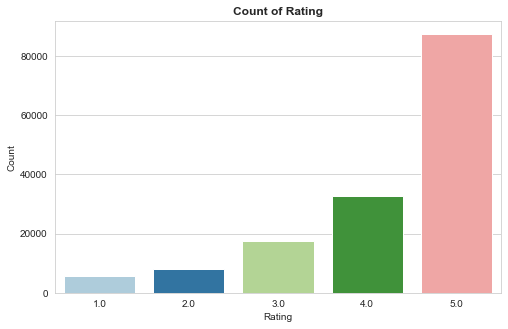

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(df['overall'].value_counts().index, df['overall'].value_counts().values, edgecolor='white', palette='Paired')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Rating', weight='bold')
plt.show()

Seperti yang dapat kita lihat dari grafik bar di atas, review dengan rating 5 sangat banyak dibandingkan dengan rating lainnya. Bahkan apabila dijumlahkan antara rating 1 sampai dengan 4, jumlahnya masih lebih sedikit dibandingkan dengan jumlah rating 5.

Kita akan membagi kolom overall ini menjadi 3 kategori yaitu: Good, Neutral, dan Bad. Good merupakan rating dalam rentang 4-5. Neutral adalah rating 3. Bad merupakan rating dari 1-2.

In [41]:
def category_rating(ser):
    if ser < 3:
        return 'Bad'
    elif ser == 3:
        return 'Neutral'
    else:
        return 'Good'

In [42]:
df['rating_category'] = df['overall'].apply(category_rating)

In [43]:
df['rating_category'].value_counts(normalize=True)

Good       0.793658
Neutral    0.115792
Bad        0.090550
Name: rating_category, dtype: float64

## 4. Review Text

Kolom ini berisi teks dari review yang diberikan oleh pembeli terhadap suatu produk. Kolom ini dapat digunakan untuk memprediksi dari nilai rating. Secara logika, pembeli yang memberikan review buruk terhadap produk akan memberikan rating yang buruk terhadap produk.

In [44]:
random_number = np.random.randint(len(df), size=1)

In [45]:
# memperlihatkan contoh dari isi text
random_number = np.random.randint(len(df), size=1)
df['reviewText'].loc[random_number].iloc[0]

"I grew up with a working mother who left the house before I got up for school, so I ate cereal five days a week, every week, until I graduated from high school, so I feel that I am qualified to judge the quality of any cereal.This latest product from Kellogg's is quite a good cereal, with just the right taste and a crunch that is very satisfying. It doesn't get soggy in milk, but I enjoyed it so much and ate it so fast that I really couldn't tell. Bottom line: I found it to be a very good cereal and think that you will also.  I will definitely be purchasing this cereal for myself in the future."

**Melihat panjang kata dalam review**

In [46]:
review_text = df[['reviewText']]

review_text['len_word'] = review_text['reviewText'].apply(lambda ser: len(str(ser).split()))

In [120]:
df[df['count_helpful']==df['count_helpful'].max()]

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title,count_helpful,all_count,percentage_helpful,rating_category,len_word
499,B00012182G,5.0,"I bought two, left them alone in the refrigera...",2012-09-23,A1EF5ODLYYMZIU,"J. A. KONRATH ""Thriller Author""",Pays for itself,1348358400,Fresh Whole Rabbit,3411,3486,97.85,Good,22


In [118]:
df['len_word'] = df['reviewText'].apply(lambda ser: len(str(ser).split()))

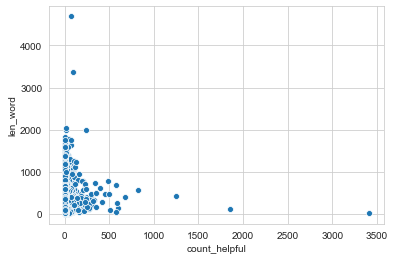

In [119]:
sns.scatterplot(data=df, x='count_helpful', y='len_word')

In [47]:
review_text.head()

,reviewText,len_word
0,Just another flavor of Kit Kat but the taste i...,31
1,I bought this on impulse and it comes from Jap...,114
2,Really good. Great gift for any fan of green t...,20
3,"I had never had it before, was curious to see ...",30
4,I've been looking forward to trying these afte...,108


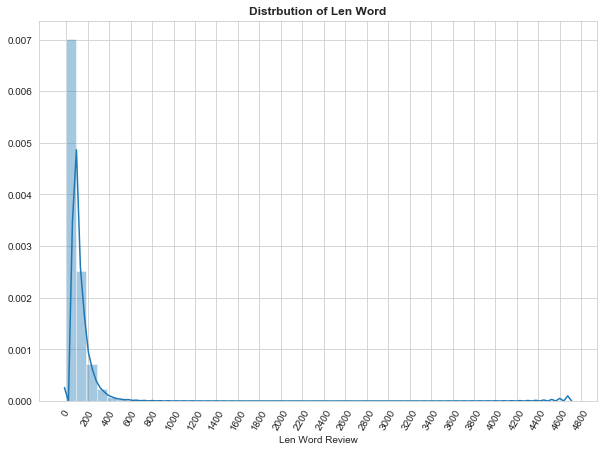

In [48]:
plt.figure(figsize=(10,7))
sns.distplot(review_text['len_word'], kde=True)
plt.xlabel('Len Word Review')
plt.title('Distrbution of Len Word', weight='bold')
plt.xticks(np.arange(0,5000,200), rotation=60)
plt.show()

Pada gambar distribusi dari jumlah kata dalam teks review di atas, banyak data dengan jumlah kata kurang dari 100. Namun, terdapat data yang memiliki jumlah kata sekitar 4700 kata.

In [49]:
review_text['len_word'].describe()

count    151254.000000
mean         93.093591
std          92.543409
min           1.000000
25%          36.000000
50%          66.000000
75%         118.000000
max        4693.000000
Name: len_word, dtype: float64

75 % data kurang dari 118 data, tetapi nilai max nya adalah 4693 kata. Tentu saja angka ini adalah pencilan. Mean dari jumlah kata adalah 93 kata.

In [116]:
df.iloc[42764]

asin                                                         B001AG6BMO
overall                                                               5
reviewText            333 Uses for Coconut Oil*Coconut Oil Is:Anti-b...
reviewTime                                          2012-03-22 00:00:00
reviewerID                                               A1J7FP5XCCSHSM
reviewerName                                                     user30
summary                   It has a "few" health benefits (Listed below)
unixReviewTime                                               1332374400
title                             Extra Virgin Coconut Oi - 32 oz - Oil
count_helpful                                                        73
all_count                                                            82
percentage_helpful                                                89.02
rating_category                                                    Good
Name: 42764, dtype: object

In [50]:
print(review_text[review_text['len_word'] == 4693]['reviewText'].iloc[0])

333 Uses for Coconut Oil*Coconut Oil Is:Anti-bacterial (kills bacteria that cause ulcers, throat infections, urinary tract infections, gum diseases, and other bacterial infections)Anti-carcinogenic (coconut oil has antimicrobial properties so it effectively prevents the spread of cancer cells and enhances the immune system)Anti-fungal (kills fungi and yeast that lead to infection)Anti-inflammatory (appears to have a direct effect in suppressing inflammation and repairing tissue, and it may also contribute by inhibiting harmful intestinal microorganisms that cause chronic inflammation.)Anti-microbial/Infection Fighting (the medium-chain fatty acids and monoglycerides found in coconut oil are the same as those in human mother's milk, and they have extraordinary antimicrobial properties. By disrupting the lipid structures of microbes, they inactivate them. About half of coconut oil consists of lauric acid. Lauric acid, its metabolite monolaurin and other fatty acids in coconut oil are kno

Review dengan jumlah kata terpanjang ternyata seperti menjelaskan manfaat dan kegunaan dari produk coconut oil. Review ini terlihat sedikit aneh dimana isi review seperti mengiklankan kembali produknya. Terdapat kemungkinan reviewer adalah kerabat dari penjual produk.

**Kata-kata paling sering muncul di dalam teks review**

Kita akan melihat kata-kata yang sering muncul dari kategori Bad, Neutral, dan Good yang telah dibuat sebelumnya. Kita ingin melihat apakah terdapat perbedaan kata yang sering muncul antara kategori tersebut.

In [51]:
good_rating = df[df['rating_category']=='Good']
neutral_rating = df[df['rating_category']=='Neutral']
bad_rating = df[df['rating_category']=='Bad']

In [52]:
import re
from nltk.corpus import stopwords

In [53]:
stopwords_eng = stopwords.words('english')

In [54]:
# Membuat fungsi untuk membersihkan  
def clean_review(text):
    text = str(text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text_without_stopwords = [word for word in text if word not in stopwords_eng]
    clean_text = ' '.join(text_without_stopwords)
    return clean_text

Fungsi diatas akan menghilangkan karakter selain alfabet dan mengubah teks menjadi huruf kecil.

In [55]:
good_rating['clean_review'] = good_rating['reviewText'].apply(clean_review)
neutral_rating['clean_review'] = neutral_rating['reviewText'].apply(clean_review)
bad_rating['clean_review'] = bad_rating['reviewText'].apply(clean_review)

In [56]:
# good rating review
good_words_dict = {}
for element in good_rating['clean_review']:
    words = element.split()
    for item in words:
        if item not in good_words_dict:
            good_words_dict[item] = 1
        else:
            good_words_dict[item] += 1

In [57]:
import pickle

In [58]:
good_word_count = pd.Series(good_words_dict).sort_values(ascending=False).head(20)

In [59]:
# pickle.dump(good_word_count, open('good_word_review.sav', 'wb'))

In [60]:
# neutral rating review
neutral_words_dict = {}
for element in neutral_rating['clean_review']:
    words = element.split()
    for item in words:
        if item not in neutral_words_dict:
            neutral_words_dict[item] = 1
        else:
            neutral_words_dict[item] += 1

In [61]:
neutral_word_count = pd.Series(neutral_words_dict).sort_values(ascending=False).head(20)

In [62]:
# pickle.dump(neutral_word_count, open('neutral_word_review.sav', 'wb'))

In [63]:
# bad rating review
bad_words_dict = {}
for element in bad_rating['clean_review']:
    words = element.split()
    for item in words:
        if item not in bad_words_dict:
            bad_words_dict[item] = 1
        else:
            bad_words_dict[item] += 1

In [64]:
bad_word_count = pd.Series(bad_words_dict).sort_values(ascending=False).head(20)

In [65]:
# pickle.dump(bad_word_count, open('bad_word_review.sav', 'wb'))

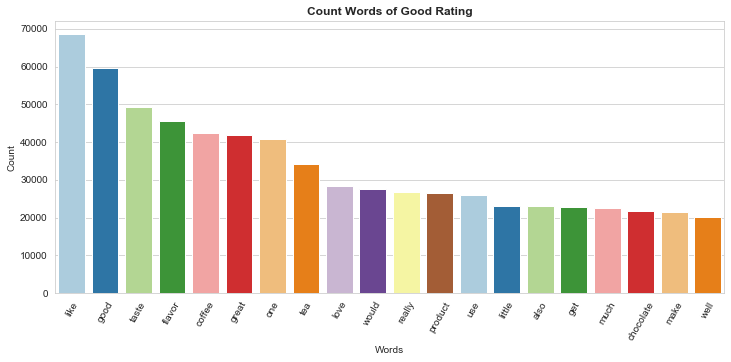

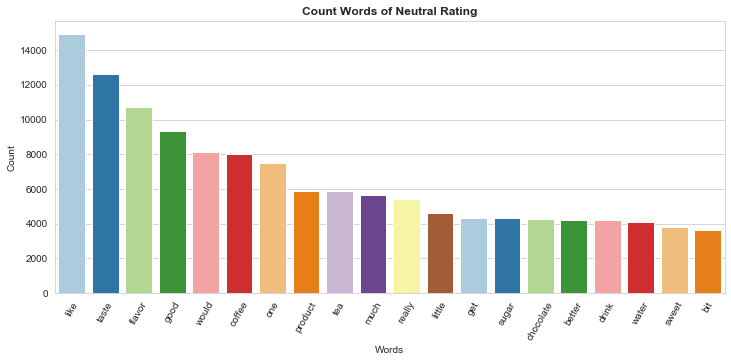

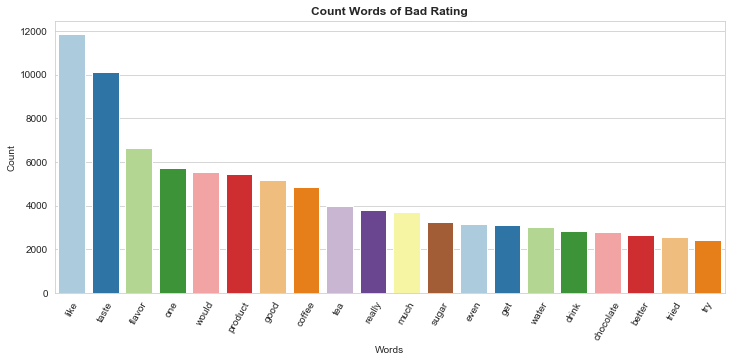

In [66]:
title = ['Good Rating', 'Neutral Rating', 'Bad Rating']
i = 0
for element in [good_word_count, neutral_word_count, bad_word_count]:
    plt.figure(figsize=(12,5))
    sns.barplot(element.index, element, palette='Paired', saturation=0.8)
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title('Count Words of {}'.format(title[i]), weight='bold')
    plt.xticks(rotation=60)
    plt.show()
    i +=1

taste dan flavor merupakan kata-kata yang sering muncul di tiga kategori rating. Hal ini menujukkan bahwa produk sering sekali dinilai berdasarkan rasa dan flavornya.

Tidak terlihat perbedaan kata yang jelas antara review pada rating dengan kategori good, neutral, dan bad. Apabila kita akan memprediksi rating menggunakan review, tentu saja akan menghasilkan nilai akurasi yang buruk. Kita harus melakukan sesuatu sebelum kita membuat model apabila kita ingin menggunakan kolom ini untuk memprediksi rating.

## 5. ReviewTime

Kolom ini merupakan kolom yang memberikan informasi kapan review dari reviewer diberikan.

In [67]:
df['reviewTime'].head()

0     06 1, 2013
1    05 19, 2014
2     10 8, 2013
3    05 20, 2013
4    05 26, 2013
Name: reviewTime, dtype: object

Bentuk dari kolom tanggal masih dalam format seperti di atas (bulan tanggal, tahun).

In [68]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

In [69]:
df['reviewTime'].head()

0   2013-06-01
1   2014-05-19
2   2013-10-08
3   2013-05-20
4   2013-05-26
Name: reviewTime, dtype: datetime64[ns]

Kita merubah kolom ini menjadi kolom bertipe datetime agar proses analisis lebih mudah dilakukan.

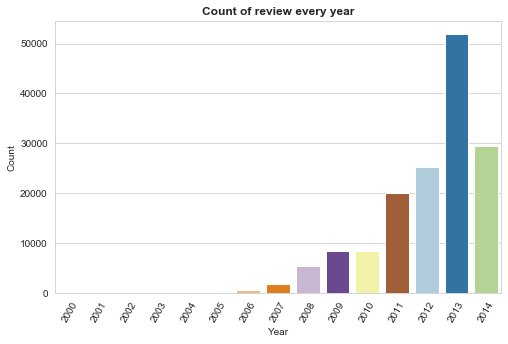

In [70]:
resample_year = df.resample('Y', on='reviewTime').count()
years = []
for tahun in resample_year.index:
    years.append(tahun.year)
plt.figure(figsize=(8,5))
sns.barplot(years, resample_year['asin'], palette='Paired')
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of review every year', weight='bold')
plt.show()

In [71]:
resample_year[['reviewText']]

,reviewText
reviewTime,
2000-12-31,1
2001-12-31,0
2002-12-31,0
2003-12-31,1
2004-12-31,11
2005-12-31,37
2006-12-31,598
2007-12-31,1826
2008-12-31,5329


Review pada data pada grocery dan gourmet food ini tersedia dari tahun 2000 sampai dengan 2014. Akan tetapi, data yang tercatat mulai banyak sekitar tahun 2011, yaitu 20000 data. Sedangkan data tahun 2000 - 2005 hanya sedikit, bahkan tidak ada data pada tahun 2001 dan 2002.

In [72]:
count_month = {}
for date in df['reviewTime']:
    if date.month not in count_month:
        count_month[date.month] = 1
    else:
        count_month[date.month] += 1

In [73]:
series_month = pd.Series(count_month).sort_index()

In [74]:
# pickle.dump(series_month, open('series_month.sav', 'wb'))

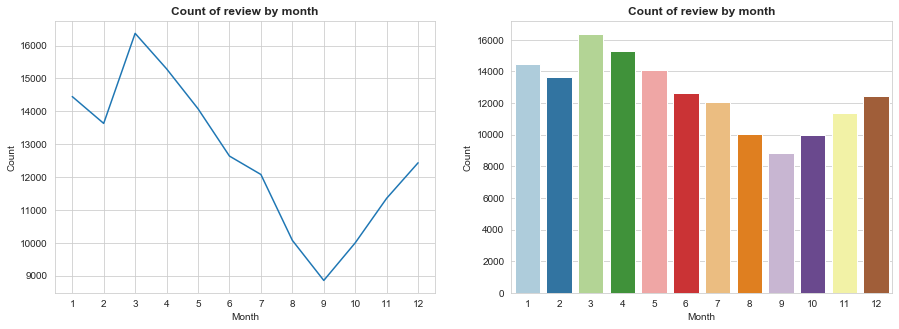

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x=series_month.index, y=series_month)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of review by month', weight='bold')
plt.xticks(np.arange(1,13,1))
plt.subplot(1,2,2)
sns.barplot(series_month.index, series_month, edgecolor='white', palette='Paired')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of review by month', weight='bold')
plt.show()

Dari gambar di atas, dapat dilihat bahwa review paling banyak terjadi pada bulan Maret, dan jumlahnya semakin menurun sampai pada titik terendahnya pada bulan September. Dari bulan September, jumlah review semakin meningkat hingga bulan Desember.

Review baru diberikan setelah produk didapatkan, mungkin terdapat beberapa produk yang baru sampai ke tangan konsumen 1-2 bulan setelah pembelian. Sehingga untuk puncak review, pada Bulan Maret mungkin pembelian dilakukan pada Bulan Januari atau Februari. Begitu juga dengan titik terendah jumlah revieww, pada Bulan September, mungkin pembelian dilakukan pada Bulan Juli atau Agustus.

Akan tetapi, dari grafik diatas, review secara umum banyak terjadi pada awal tahun dan akhir tahun, sedangkan tengah tahun mengalami penurunan.

In [76]:
count_day = {}
for date in df['reviewTime']:
    if date.day not in count_day:
        count_day[date.day] = 1
    else:
        count_day[date.day] += 1

In [77]:
series_day = pd.Series(count_day).sort_index()

In [78]:
# pickle.dump(series_day, open('series_day.sav', 'wb'))

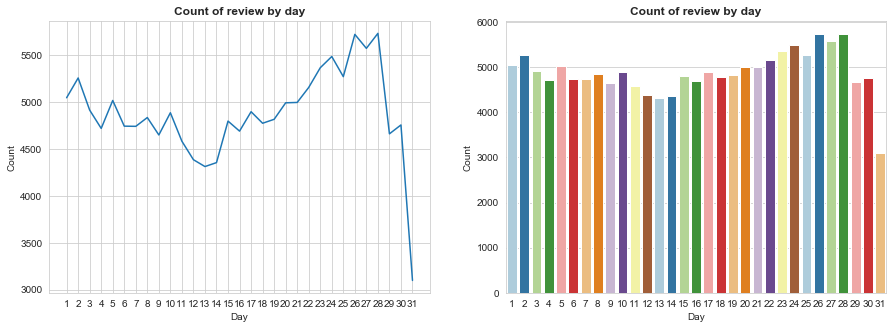

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x=series_day.index, y=series_day)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of review by day', weight='bold')
plt.xticks(np.arange(1,32,1))
plt.subplot(1,2,2)
sns.barplot(series_day.index, series_day, edgecolor='white', palette='Paired')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of review by day', weight='bold')
plt.show()

Pada awal bulan hingga pertengahan bulan, terjadi penurunan jumlah review. Dari tengah bulan hingga akhir bulan, terjadi peningkatan. Jumlah review paling banyak terjadi pada akhir bulan, sekitar tanggal 25-28. Namun terjadi penurunan 29-31 sangat tajam.

In [80]:
count_weekday = {}
for date in df['reviewTime']:
    weekday = date.weekday() + 1
    if weekday not in count_weekday:
        count_weekday[weekday] = 1
    else:
        count_weekday[weekday] += 1

In [81]:
series_weekday = pd.Series(count_weekday).sort_index()

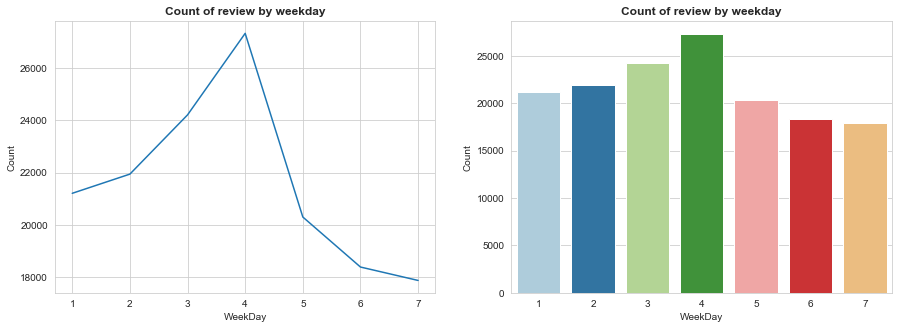

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x=series_weekday.index, y=series_weekday)
plt.xlabel('WeekDay')
plt.ylabel('Count')
plt.title('Count of review by weekday', weight='bold')
plt.xticks(np.arange(1,8,1))
plt.subplot(1,2,2)
sns.barplot(series_weekday.index, series_weekday, edgecolor='white', palette='Paired')
plt.xlabel('WeekDay')
plt.ylabel('Count')
plt.title('Count of review by weekday', weight='bold')
plt.show()

Jumlah review paling banyak terjadi pada hari Kamis. Tidak disangka, Jumat, Sabtu, dan Minggu jumlah review tidak terlalu banyak, bahkan tidak sebanyak pada hari Senin, Selasa, dan Rabu.

## 7. Reviewer Id dan Reviewer Name

ReviewerID dan Reviewer Name sebetulnya menginformasikan sesuatu yang sama. Satu ReviewerId menunjukan satu orang reviewer.

In [83]:
df['reviewerID'].nunique()

14681

Terdapat 14681 reviewer di dalam data ini.

In [84]:
print(f'Terdapat {df["reviewerID"].isnull().sum()} data dalam kolom reviewerID yang kosong')
print(f'Terdapat {df["reviewerName"].isnull().sum()} data dalam kolom reviewerName yang kosong')

Terdapat 0 data dalam kolom reviewerID yang kosong
Terdapat 1493 data dalam kolom reviewerName yang kosong


In [85]:
df['reviewerID'].value_counts().head(10)

A3OXHLG6DIBRW8    204
AY12DBB0U420B     180
A2XKJ1KX6XUHYP    177
A1UQBFCERIP7VJ    156
AAA0TUKS5VBSA     149
A2MNB77YGJ3CN0    145
A25C2M3QF9G7OQ    141
A1Z54EM24Y40LL    140
A2YKWYC3WQJX5J    132
AKMEY1BSHSDG7     127
Name: reviewerID, dtype: int64

In [86]:
df[df['reviewerID'] == 'A3OXHLG6DIBRW8']

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title,count_helpful,all_count,percentage_helpful,rating_category
269,B0000DID5R,5.0,"""Dave's Insanity Sauce"" is not to be taken cas...",2010-06-19,A3OXHLG6DIBRW8,"C. Hill ""CFH""",This Is HOT - Highly Recommended!,1276905600,Dave's Original Insanity Hot Sauce - 5oz,0,1,0.00,Good
318,B0000DJDJZ,5.0,"""Joseph's Original Sugar Free Maple Flavor Syr...",2009-01-07,A3OXHLG6DIBRW8,"C. Hill ""CFH""",Really Good Syrup! Highly Recommended!,1231286400,"Joseph's Sugar Free Maple Flavor Syrup, 12oz",0,0,NaN,Good
341,B0000ESTGX,5.0,"Sans Sucre ""Mousse Mix - Chocolate Cheesecake""...",2009-05-05,A3OXHLG6DIBRW8,"C. Hill ""CFH""",WOW - REALLY Good Diet Mousse - Highly Recomme...,1241481600,Sans Sucre Mousse Mix - Chocolate Cheesecake,2,2,100.00,Good
865,B00016LA7K,5.0,"This ""Better Than Bouillon"" is my wife's secre...",2012-10-15,A3OXHLG6DIBRW8,"C. Hill ""CFH""",It Is Better Than Bouillon - Highly Recommended,1350259200,ChiBetter Than Bouillon Chicken Base 8oz,0,0,NaN,Good
1878,B0002407RU,4.0,Understanding that these are diet Salad Dressi...,2009-04-25,A3OXHLG6DIBRW8,"C. Hill ""CFH""","No Anything, Good Tasting Dressing - Recommended",1240617600,Walden Farms Calorie Free Dressing Ranch -- 12...,0,0,NaN,Good
2121,B0002L3BYO,4.0,The Walden Farms Chocolate Dip was a good find...,2009-07-06,A3OXHLG6DIBRW8,"C. Hill ""CFH""",Good Tasting Dip - Recommended,1246838400,"Walden Farms Chocolate Dip, 12-Ounce Jar (Pack...",1,1,100.00,Good
2201,B0002PSOJW,5.0,"Huy Fong ""Sriracha Hot Chili Sauce"" is offered...",2010-06-19,A3OXHLG6DIBRW8,"C. Hill ""CFH""","Great Flavor and Heat, Highly Recommended",1276905600,"Huy Fong, Sriracha Hot Chili Sauce, 17 Ounce B...",4,5,80.00,Good
2394,B00032G1S0,5.0,I occasionaly check to make sure that Amazon i...,2006-11-20,A3OXHLG6DIBRW8,"C. Hill ""CFH""",Tuscan Whole Milk & Bananas!,1163980800,"Tuscan Whole Milk, 1 Gallon, 128 fl oz",15,18,83.33,Good
2497,B0004MTMD0,5.0,These McCormick Diced Jalape&ntilde;o Peppers ...,2012-10-24,A3OXHLG6DIBRW8,"C. Hill ""CFH""",Great Flavor and Heat - Highly Recommended,1351036800,"McCormick Gourmet Collection Lemon Peel, 1.5 O...",2,3,66.67,Good
3433,B0007IQQXA,3.0,"A sample of these Van Houtte ""French Vanilla K...",2010-08-31,A3OXHLG6DIBRW8,"C. Hill ""CFH""",Just OK Flavored Coffee,1283212800,Van Houtte French Vanilla Coffee Keurig K-Cups...,1,1,100.00,Neutral


Id yang paling sering melakukan review adalah A3OXHLG6DIBRW8 bernama C.Hill"CFH" dengan review sebanyak 204 kali.

In [87]:
df['reviewerID'].value_counts().tail()

A1Q1YEWTUTC9CU    5
A1RL1OTV8IJMVD    5
A2OQQ1YAV8RYM8    5
A33B7U32Y9MW3V    5
A1MJ4WTOYW9WXZ    5
Name: reviewerID, dtype: int64

Dalam dataset ini, setiap orang paling tidak melakukan review terhadap 5 produk, hal ini dapat dilihat dari method tail diatas.

## 8. Summary

Summary adalah rangkuman dari kolom reviewText. Kita akan melakukan hal yang sama terhadap kolom summary, seperti yang dilakukan pada kolom review text.

In [88]:
summary_text = df[['summary']]

summary_text['len_word_summary'] = summary_text['summary'].apply(lambda ser: len(str(ser).split()))

In [89]:
summary_text.head()

,summary,len_word_summary
0,Good Taste,2
1,"3.5 stars, sadly not as wonderful as I had hoped",10
2,Yum!,1
3,Unexpected flavor meld,3
4,"Not a very strong tea flavor, but still yummy ...",11


In [90]:
# Membuat fungsi untuk membersihkan summary 
def clean_summary(text):
    text = str(text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text_without_stopwords = [word for word in text if word not in stopwords_eng]
    clean_text = ' '.join(text_without_stopwords)
    return clean_text

In [91]:
good_rating['clean_summary'] = good_rating['summary'].apply(clean_summary)
neutral_rating['clean_summary'] = neutral_rating['summary'].apply(clean_summary)
bad_rating['clean_summary'] = bad_rating['summary'].apply(clean_summary)

In [92]:
# good rating summary
good_words_summary = {}
for element in good_rating['clean_summary']:
    words = element.split()
    for item in words:
        if item not in good_words_summary:
            good_words_summary[item] = 1
        else:
            good_words_summary[item] += 1

In [93]:
good_word_sum = pd.Series(good_words_summary).sort_values(ascending=False).head(20)

In [94]:
# pickle.dump(good_word_sum, open('good_word_sum.sav', 'wb'))

In [95]:
# neutral rating summary
neutral_words_summary = {}
for element in neutral_rating['clean_summary']:
    words = element.split()
    for item in words:
        if item not in neutral_words_summary:
            neutral_words_summary[item] = 1
        else:
            neutral_words_summary[item] += 1

In [96]:
neutral_word_sum = pd.Series(neutral_words_summary).sort_values(ascending=False).head(20)

In [97]:
# pickle.dump(neutral_word_sum, open('neutral_word_sum.sav', 'wb'))

In [98]:
# bad rating summary
bad_words_summary = {}
for element in bad_rating['clean_summary']:
    words = element.split()
    for item in words:
        if item not in bad_words_summary:
            bad_words_summary[item] = 1
        else:
            bad_words_summary[item] += 1

In [99]:
bad_word_sum = pd.Series(bad_words_summary).sort_values(ascending=False).head(20)

In [100]:
# pickle.dump(bad_word_sum, open('bad_word_sum.sav', 'wb'))

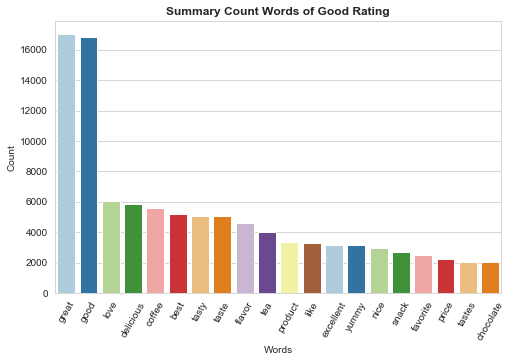

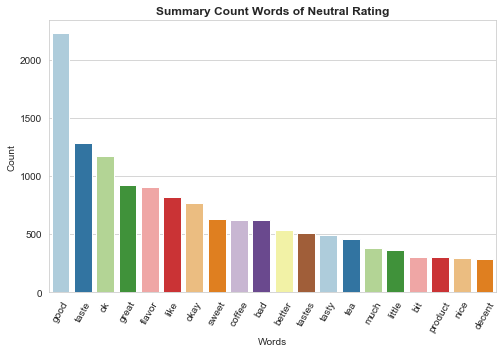

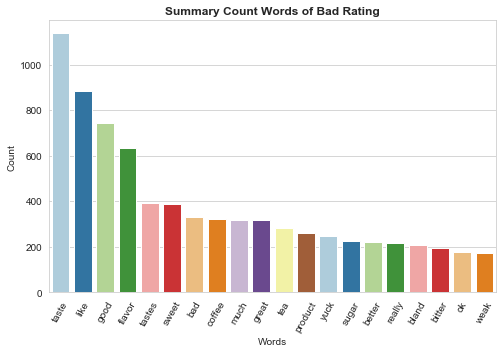

In [101]:
title = ['Good Rating', 'Neutral Rating', 'Bad Rating']
i = 0
for element in [good_word_sum, neutral_word_sum, bad_word_sum]:
    plt.figure(figsize=(8,5))
    sns.barplot(element.index, element, palette='Paired')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title('Summary Count Words of {}'.format(title[i]), weight='bold')
    plt.xticks(rotation=60)
    plt.show()
    i +=1

Perbedaan kata dari kolom summary untuk good, neutral, dan bad lebih terlihat perbedaannya dibandingkan dari kolom reviewText. Kolom ini lebih cocok digunakan untuk sentimen analisis.

# Metadata

Kita akan mengeksplorasi data title dari metadata

In [102]:
title_meta = meta[['title']]

In [103]:
# Membuat fungsi untuk membersihkan title 
def clean_title(text):
    text = str(text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text_without_stopwords = [word for word in text if word not in stopwords_eng]
    clean_text = ' '.join(text_without_stopwords)
    return clean_text

In [104]:
title_meta['clean_title'] = title_meta['title'].apply(clean_title)

In [105]:
all_title_text = ' '.join(list(title_meta['clean_title']))

In [106]:
from wordcloud import WordCloud

In [107]:
def show_word_cloud(text):
    wc = WordCloud(background_color='white', max_font_size=50, max_words=300)
    img_text = wc.generate(text)
    plt.figure(figsize=(20,5))
    plt.imshow(img_text, interpolation='bilinear')
    plt.axis('off')
    plt.show()

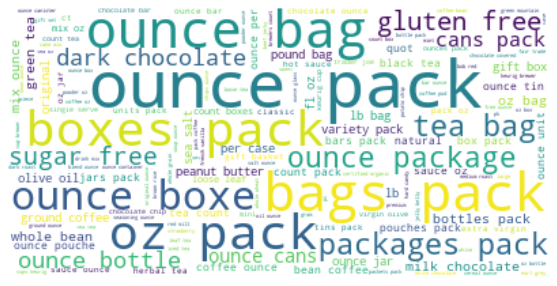

In [108]:
show_word_cloud(all_title_text)

In [109]:
edited_all_title = all_title_text

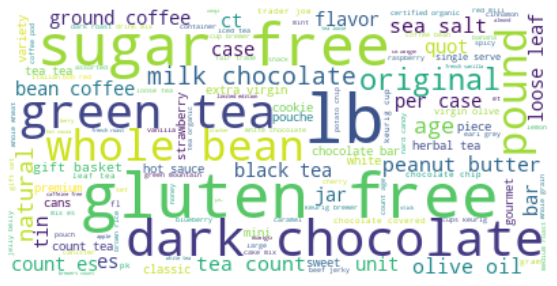

In [110]:
for element in ['ounce', 'pack', 'oz', 'bag', 'box', 'boxe', 'boxes', 'pakcages', 'package', 'bottle']:
    edited_all_title = edited_all_title.replace(element, '')
    edited_all_title = ' '.join(edited_all_title.split())

show_word_cloud(edited_all_title)

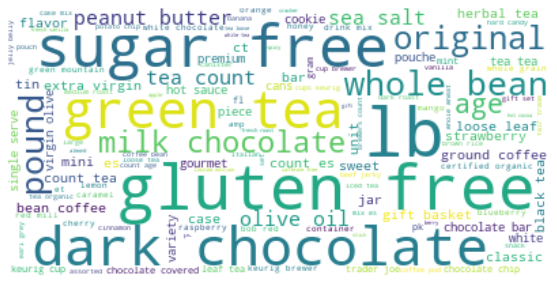

In [111]:
for element in ['quot', 'ounce tin', 'box pack', 'ounce bag', 'units pack', 'per case', 'natural']:
    edited_all_title = edited_all_title.replace(element, '')
    edited_all_title = ' '.join(edited_all_title.split())
    
show_word_cloud(edited_all_title)

Produk yang paling banyak mncul adalah tea, chocolate, bean, ovile oil, sea salt, peanut butter, 